In [0]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -w

data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
train.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
import pandas as pd

In [2]:
housing_train = pd.read_csv('datasets/all/train.csv',index_col='Id')
housing_test = pd.read_csv('datasets/all/test.csv',index_col='Id')
housing_df_orig = housing_train.append(housing_test)

/home/skanda/Software/anaconda3/envs/pycloud/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
housing_df_orig.head(3)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008


In [4]:
housing_df_orig.columns.to_series().groupby(housing_df_orig.dtypes).groups

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch',
        'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
        'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
        'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
        'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
        'SalePrice', 'TotalBsmtSF'],
       dtype='object'),
 dtype('O'): Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 

In [5]:
ordered_cats = {
    'LandSlope':['Gtl','Mod','Sev'],
    'HouseStyle':['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],
    'GarageFinish':['NA','Unf','RFn','Fin'],
    'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
    'CentralAir':['N','Y'],
    'BsmtFinType1':['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'BsmtFinType2':['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'BsmtExposure':['NA','No','Mn','Av','Gd'],
    'LotShape':['IR3','IR2','IR1','Reg'],
    'Utilities':['ELO','NoSeWa','NoSeWr','AllPub'],
    'LandSlope':['Gtl','Mod','Sev'],
    'Fence':['NA','MnWw','GdWo','MnPrv','GdPrv']
    
}
ordered_qual = ['NA','Po','Fa','TA','Gd','Ex']
qual_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual', \
             'FireplaceQu','GarageQual','GarageCond','PoolQC']

ordered_cats.update({col:ordered_qual for col in qual_cols})

In [6]:
ordered_cats

{'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'ExterCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
 'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
 'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'HeatingQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'HouseStyle': ['1Story',
  '1.5Unf',
  '1.5Fin',
  '2Story',
  '2.5Unf',
  '2.5Fin',
  'SFoyer',
  'SLvl'],
 'KitchenQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'

In [7]:
def any_nan(df):
    return [k for k,v in df.isna().any().to_dict().items() if v]
any_nan(housing_df_orig)

['GarageCond',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'SalePrice',
 'LotFrontage',
 'GarageQual',
 'MiscFeature',
 'GarageType',
 'GarageYrBlt',
 'Functional',
 'Fence',
 'BsmtHalfBath',
 'FireplaceQu',
 'SaleType',
 'BsmtFinSF2',
 'BsmtFinType2',
 'Exterior2nd',
 'Electrical',
 'GarageFinish',
 'TotalBsmtSF',
 'PoolQC',
 'KitchenQual',
 'GarageArea',
 'BsmtCond',
 'BsmtFinType1',
 'GarageCars',
 'MasVnrType',
 'BsmtQual',
 'BsmtFullBath',
 'Exterior1st',
 'Alley',
 'MasVnrArea',
 'Utilities',
 'MSZoning',
 'BsmtExposure']

In [8]:
to_order_repl = {col_name:cats[0] for col_name,cats in ordered_cats.items()}

In [9]:
def fill_na_basic(df,ordered=False,min_order=0,str_def='UNKNOWN',num_def=0):
    
    if ordered:
        to_order_repl = {col_name:cats[0] for col_name,cats in ordered_cats.items()}
        df = df.fillna(to_order_repl)
        
    str_replace_cols = df.select_dtypes(['O','category'])
    to_str_repl = {col_name:str_def for col_name in str_replace_cols}
    df = df.fillna(to_str_repl)
    
    return df.fillna(num_def)

In [10]:
housing_df_nona = fill_na_basic(housing_df_orig,ordered_cats)

In [11]:
housing_df_nona

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,UNKNOWN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,UNKNOWN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,UNKNOWN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,UNKNOWN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,UNKNOWN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,UNKNOWN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
7,1694,0,0,UNKNOWN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
8,1107,983,0,UNKNOWN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
9,1022,752,0,UNKNOWN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008


In [12]:
def factorize_df(df,ordered=False):
    factorize_index = {}
    
    if ordered:
        for col_name in ordered:
            if col_name in df:
                mapping_dict = {obj:i for i,obj in enumerate(ordered[col_name])}
                df[col_name] = df[col_name].map(mapping_dict)
                factorize_index[col_name] = mapping_dict
            else:
                raise KeyError('The column named '+col_name+' passed is not present in the dataframe'+ \
                               'with columns '+str(df.columns))
                               
    to_fact = df.select_dtypes(['O','category'])
    for key in to_fact:
        df[key],fact_index = pd.factorize(df[key])
        factorize_index[key] = fact_index
                               
    return df,factorize_index

In [13]:
housing_df_fact,fact_idx= factorize_df(housing_df_nona,ordered_cats)

In [14]:
housing_df_fact

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,0,3,0,3,1,706.0,0.0,...,0,0,0,8,856.0,3,0,2003,2003,2008
2,1262,0,0,0,3,0,3,4,978.0,0.0,...,0,0,0,6,1262.0,3,298,1976,1976,2007
3,920,866,0,0,3,0,3,2,486.0,0.0,...,0,0,0,6,920.0,3,0,2001,2002,2008
4,961,756,0,0,3,0,4,1,216.0,0.0,...,0,0,0,7,756.0,3,0,1915,1970,2006
5,1145,1053,0,0,4,0,3,3,655.0,0.0,...,0,0,0,9,1145.0,3,192,2000,2000,2008
6,796,566,320,0,1,0,3,1,732.0,0.0,...,0,0,0,5,796.0,3,40,1993,1995,2009
7,1694,0,0,0,3,0,3,3,1369.0,0.0,...,0,0,0,7,1686.0,3,255,2004,2005,2007
8,1107,983,0,0,3,0,3,2,859.0,32.0,...,0,0,0,7,1107.0,3,235,1973,1973,2009
9,1022,752,0,0,2,0,3,1,0.0,0.0,...,0,0,0,8,952.0,3,90,1931,1950,2008


In [15]:
any_nan(housing_df_fact)

[]

In [16]:
fact_idx

{'Alley': Index(['UNKNOWN', 'Grvl', 'Pave'], dtype='object'),
 'BldgType': Index(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype='object'),
 'BsmtCond': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'NA': 0, 'Po': 1, 'TA': 3},
 'BsmtExposure': {'Av': 3, 'Gd': 4, 'Mn': 2, 'NA': 0, 'No': 1},
 'BsmtFinType1': {'ALQ': 5,
  'BLQ': 4,
  'GLQ': 6,
  'LwQ': 2,
  'NA': 0,
  'Rec': 3,
  'Unf': 1},
 'BsmtFinType2': {'ALQ': 5,
  'BLQ': 4,
  'GLQ': 6,
  'LwQ': 2,
  'NA': 0,
  'Rec': 3,
  'Unf': 1},
 'BsmtQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'NA': 0, 'Po': 1, 'TA': 3},
 'CentralAir': {'N': 0, 'Y': 1},
 'Condition1': Index(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'],
       dtype='object'),
 'Condition2': Index(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], dtype='object'),
 'Electrical': Index(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'UNKNOWN'], dtype='object'),
 'ExterCond': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'NA': 0, 'Po': 1, 'TA': 3},
 'ExterQual': {'E

In [17]:
housing_df_fact['SalePrice']

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
6       143000.0
7       307000.0
8       200000.0
9       129900.0
10      118000.0
11      129500.0
12      345000.0
13      144000.0
14      279500.0
15      157000.0
16      132000.0
17      149000.0
18       90000.0
19      159000.0
20      139000.0
21      325300.0
22      139400.0
23      230000.0
24      129900.0
25      154000.0
26      256300.0
27      134800.0
28      306000.0
29      207500.0
30       68500.0
          ...   
2890         0.0
2891         0.0
2892         0.0
2893         0.0
2894         0.0
2895         0.0
2896         0.0
2897         0.0
2898         0.0
2899         0.0
2900         0.0
2901         0.0
2902         0.0
2903         0.0
2904         0.0
2905         0.0
2906         0.0
2907         0.0
2908         0.0
2909         0.0
2910         0.0
2911         0.0
2912         0.0
2913         0.0
2914         0.0
2915         0.0
2916         0.0
2917       

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: No module named 'matplotlib'

In [20]:
from sklearn.linear_model import LinearRegression as lr

In [21]:
lr_model = lr(n_jobs=-1)

In [22]:
Y_net = housing_df_fact['SalePrice']
X_net = housing_df_fact.loc[:,housing_df_fact.columns != 'SalePrice']

In [30]:
import numpy as np
X_train, X_test = X_net[:len(housing_train)], X_net[len(housing_train):]
Y_train = Y_net[:len(housing_train)]
print(np.shape(X_train))
print(np.shape(Y_train))

(1460, 79)
(1460,)


In [31]:
lr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [32]:
np.shape(lr_model.coef_)

(79,)

In [0]:
Y_pred = lr_model.predict(X_test)

In [0]:
Y_pred

array([112614.76853357, 180352.43769602, 164617.87634514, ...,
       162329.71992827, 115429.82802823, 239988.0454908 ])

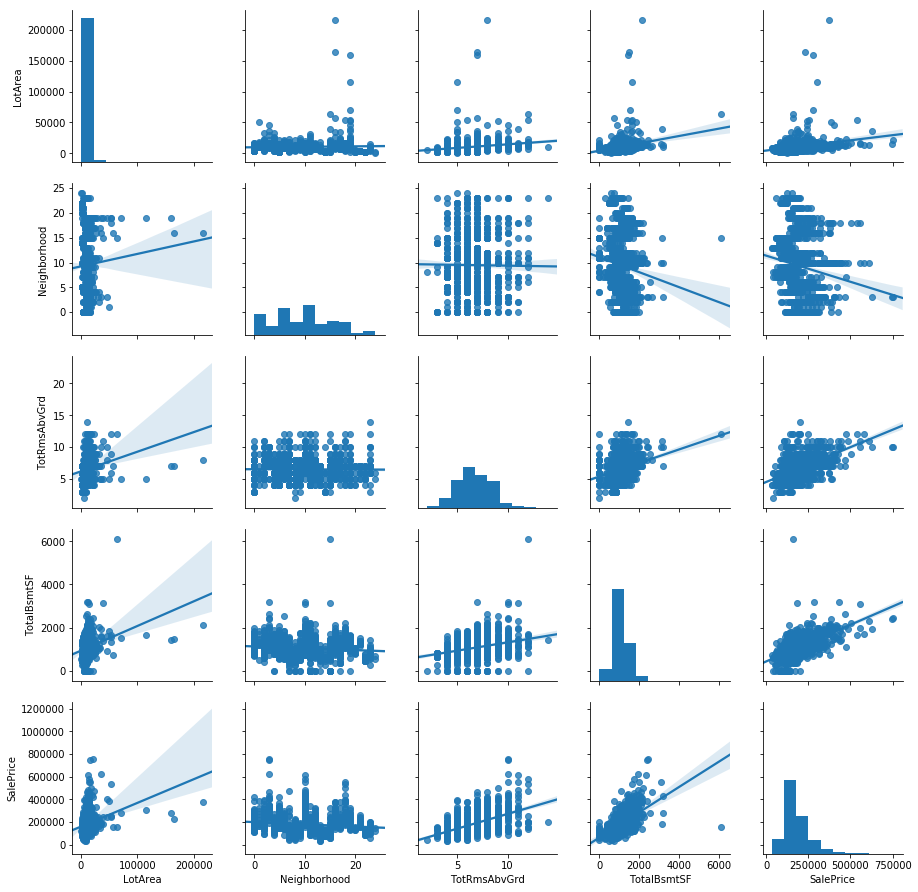

In [0]:
sns.pairplot(data=housing_df_nona[:len(housing_train)],
             vars=['LotArea','Neighborhood','TotRmsAbvGrd','TotalBsmtSF','SalePrice'],kind='reg')

In [0]:
housing_df_nona

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,0,3,0,3,1,706.0,0.0,...,0,0,0,8,856.0,3,0,2003,2003,2008
2,1262,0,0,0,3,0,3,4,978.0,0.0,...,0,0,0,6,1262.0,3,298,1976,1976,2007
3,920,866,0,0,3,0,3,2,486.0,0.0,...,0,0,0,6,920.0,3,0,2001,2002,2008
4,961,756,0,0,3,0,4,1,216.0,0.0,...,0,0,0,7,756.0,3,0,1915,1970,2006
5,1145,1053,0,0,4,0,3,3,655.0,0.0,...,0,0,0,9,1145.0,3,192,2000,2000,2008
6,796,566,320,0,1,0,3,1,732.0,0.0,...,0,0,0,5,796.0,3,40,1993,1995,2009
7,1694,0,0,0,3,0,3,3,1369.0,0.0,...,0,0,0,7,1686.0,3,255,2004,2005,2007
8,1107,983,0,0,3,0,3,2,859.0,32.0,...,0,0,0,7,1107.0,3,235,1973,1973,2009
9,1022,752,0,0,2,0,3,1,0.0,0.0,...,0,0,0,8,952.0,3,90,1931,1950,2008
